# A) Data Manipulation:
##a. Find the total number of male customers
##b. Find the total number of customers whose Internet Service is ‘DSL’
##c. Extract all the Female senior citizens whose Payment Method is Mailed check & store the
##result in ‘new_customer’
##d. Extract all those customers whose tenure is less than 10 months or their Total charges is less
##than 500$ & store the result in ‘new_customer’

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [68]:
dataset = pd.read_csv("/content/customer_churn (4).csv")

In [3]:
dataset

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
dataset.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

 Total Charges should be float datatype rather than object

In [69]:
dataset['TotalCharges'] = pd.to_numeric(dataset['TotalCharges'], errors='coerce')

In [ ]:
dataset['TotalCharges']

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [ ]:
dataset.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
dataset.columns.value_counts().sum()

21

In [ ]:
dataset['gender'].unique()

array(['Female', 'Male'], dtype=object)

In [ ]:
dataset[dataset['gender'] == 'Male']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7033,9767-FFLEM,Male,0,No,No,38,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Credit card (automatic),69.50,2625.25,No
7035,8456-QDAVC,Male,0,No,No,19,Yes,No,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic),78.70,1495.1,No
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [ ]:
label_encoder = preprocessing.LabelEncoder()
dataset['gender'] = label_encoder.fit_transform(dataset['gender'])

In [ ]:
dataset

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,1,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,1,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,1,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,0,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,1,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,0,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,0,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,1,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [ ]:
dataset['gender'].value_counts()

gender
1    3555
0    3488
Name: count, dtype: int64

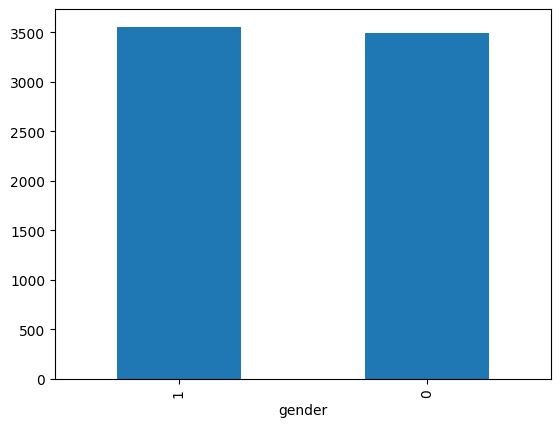

In [ ]:
dataset['gender'].value_counts().plot(kind = 'bar')
plt.show()

# Total number of male customers = 3555

In [ ]:
dataset['InternetService'].value_counts()

InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

# Find the total number of customers whose Internet Service is ‘DSL’ = 2421


In [ ]:
Extract all the Female senior citizens whose Payment Method is Mailed check & store the
result in ‘new_customer’

In [ ]:
new_customer = dataset[(dataset['gender'] == 0) & (dataset['SeniorCitizen'] == 1) & (dataset['PaymentMethod'] == 'Mailed check')]

In [ ]:
new_customer

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
139,0390-DCFDQ,0,1,Yes,No,1,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,70.45,70.45,Yes
176,2656-FMOKZ,0,1,No,No,15,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.45,1145.7,Yes
267,3197-ARFOY,0,1,No,No,19,Yes,No,Fiber optic,Yes,...,No,Yes,Yes,Yes,Month-to-month,Yes,Mailed check,105.00,2007.25,No
451,5760-WRAHC,0,1,No,No,22,Yes,No,DSL,Yes,...,Yes,Yes,No,Yes,Month-to-month,Yes,Mailed check,69.75,1545.4,No
470,4933-IKULF,0,1,No,No,17,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.65,330.6,No
694,2682-KEVRP,0,1,No,No,22,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,20.05,417,No
747,3966-HRMZA,0,1,No,No,3,Yes,No,Fiber optic,No,...,Yes,No,No,No,Month-to-month,No,Mailed check,75.05,202.9,No
947,9904-EHEVJ,0,1,Yes,Yes,32,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,No,Month-to-month,Yes,Mailed check,91.35,2896.55,No
1029,4184-TJFAN,0,1,Yes,Yes,3,Yes,No,Fiber optic,Yes,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,88.30,273.75,Yes
1112,2176-LVPNX,0,1,No,No,71,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,Two year,No,Mailed check,89.85,6293.45,No


In [ ]:
new_customer_1 = dataset[(dataset['tenure'] < 10 ) | (dataset['TotalCharges'] < 500)]

In [ ]:
new_customer_1

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
2,3668-QPYBK,1,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,9237-HQITU,0,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,0,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
7,6713-OKOMC,0,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7029,2235-DWLJU,0,1,No,No,6,No,No phone service,DSL,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,44.40,263.05,No
7030,0871-OPBXW,0,0,No,No,2,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.05,39.25,No
7032,6894-LFHLY,1,1,No,No,1,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,75.75,75.75,Yes
7040,4801-JZAZL,0,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


# B) Data Visualization:
## a. Build a pie-chart to show the distribution of customers would be churning out
## b. Build a bar-plot to show the distribution of ‘Internet Service’


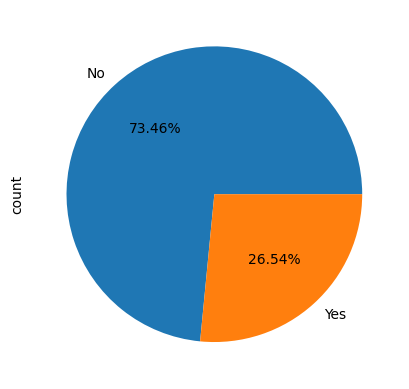

In [ ]:
dataset['Churn'].value_counts().plot(kind = 'pie', autopct='%1.2f%%')
plt.show()

## we can see the percentage of customers not churning is more than the customers churning

In [ ]:
dataset['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

<Axes: xlabel='InternetService'>

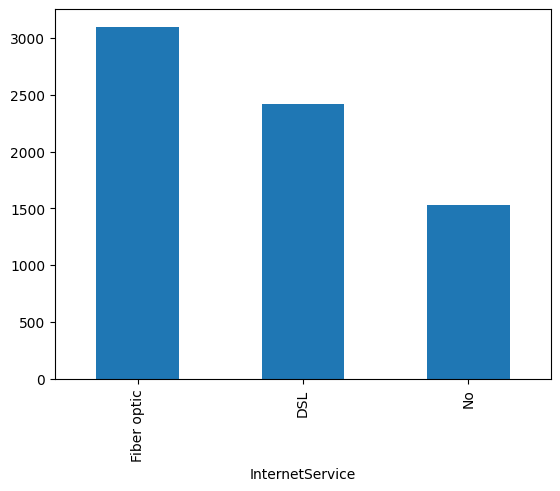

In [ ]:
dataset['InternetService'].value_counts().plot(kind = 'bar')

### max customers choose Fiber Optic(more than 3000), next is DSL. But their are few customers with no service.
same thing we see below using value_counts function


In [ ]:
dataset['InternetService'].value_counts()

InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

# C) Model Building:
### a. Build a sequential model using Keras, to find out if the customerwouldchurn or not, using
‘tenure’ as the feature and ‘Churn’ as the dependent/target column:
#### i. The visible/input layer should have 12 nodes with ‘Relu’ as activation function.
#### ii. This model would have 1 hidden layer with 8 nodes and ‘Relu’ as activation function
#### iii. Use ‘Adam’ as the optimization algorithm
#### iv. Fit the model on the train set, with number of epochs to be 150
#### v. Predict the values on the test set and build a confusion matrix
#### vi. Plot the ‘Accuracy vs Epochs’ graph

In [23]:
X = dataset['tenure']

In [96]:
label_encoder = preprocessing.LabelEncoder()
dataset['Churn'] = label_encoder.fit_transform(dataset['Churn'])

In [97]:
Y = dataset['Churn']

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [ ]:
X_train.shape


(4930,)

In [ ]:
X_train

1695    54
1095     1
3889    13
3667    24
2902     6
        ..
3772     1
5191    23
5226    12
5390    12
860     26
Name: tenure, Length: 4930, dtype: int64

In [ ]:
y_train.shape

(4930,)

In [ ]:
y_train

1695    0
1095    0
3889    0
3667    0
2902    0
       ..
3772    1
5191    0
5226    0
5390    1
860     0
Name: Churn, Length: 4930, dtype: int64

In [ ]:
X_test.shape

(2113,)

In [ ]:
y_test.shape

(2113,)

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense,Dropout

In [26]:
model = Sequential() ## Empty model without any inputs or outputs
model.add(Input(shape=(1,))) ##no computation
model.add(Dense(units = 8, activation = "relu"))
model.add(Dense(units = 1, activation = "sigmoid"))# binary class classification output.
## Softmax helps in converting all the ouputs of the 10 units into probabilities. If not for that
## the model would return numeric outputs ranging between (-inf, +inf)

In [27]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics="accuracy")
# sgd = stochastic gradient descent

In [28]:
model.fit(x=X_train, y=y_train, epochs=150, validation_split = 0.2)

Epoch 1/150
124/124 [==============================] - 1s 4ms/step - loss: 7.3886 - accuracy: 0.2766 - val_loss: 0.5588 - val_accuracy: 0.7556
Epoch 2/150
124/124 [==============================] - 0s 3ms/step - loss: 0.5229 - accuracy: 0.7328 - val_loss: 0.4972 - val_accuracy: 0.7556
Epoch 3/150
124/124 [==============================] - 0s 3ms/step - loss: 0.5203 - accuracy: 0.7328 - val_loss: 0.4946 - val_accuracy: 0.7556
Epoch 4/150
124/124 [==============================] - 1s 5ms/step - loss: 0.5191 - accuracy: 0.7328 - val_loss: 0.4935 - val_accuracy: 0.7556
Epoch 5/150
124/124 [==============================] - 1s 4ms/step - loss: 0.5195 - accuracy: 0.7328 - val_loss: 0.4949 - val_accuracy: 0.7556
Epoch 6/150
124/124 [==============================] - 0s 3ms/step - loss: 0.5182 - accuracy: 0.7328 - val_loss: 0.4928 - val_accuracy: 0.7556
Epoch 7/150
124/124 [==============================] - 0s 4ms/step - loss: 0.5183 - accuracy: 0.7328 - val_loss: 0.4948 - val_accuracy: 0.7556

In [29]:
history = model.history.history

In [30]:
from sklearn.metrics import confusion_matrix
import numpy as np

In [31]:
y_prediction = model.predict(X_test)

67/67 [==============================] - 0s 1ms/step


In [32]:
y_prediction

array([[0.49422535],
       [0.1456428 ],
       [0.09540213],
       ...,
       [0.06922708],
       [0.29891896],
       [0.28094885]], dtype=float32)

In [33]:
y_pred = np.argmax(y_prediction, axis = 1)


In [34]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [35]:
result = confusion_matrix(y_test, y_pred )

In [36]:
result

array([[1539,    0],
       [ 574,    0]])

In [37]:
history

{'loss': [7.388615131378174,
  0.5228627920150757,
  0.5203127264976501,
  0.5190837383270264,
  0.5194650292396545,
  0.5181761384010315,
  0.5183033347129822,
  0.5177496075630188,
  0.5170484781265259,
  0.516723096370697,
  0.516521692276001,
  0.5165719985961914,
  0.5167113542556763,
  0.5174640417098999,
  0.5169360041618347,
  0.5180243849754333,
  0.5165286660194397,
  0.5175057053565979,
  0.517417311668396,
  0.5164729356765747,
  0.5164738297462463,
  0.5166459679603577,
  0.5169045925140381,
  0.5164404511451721,
  0.5180150866508484,
  0.5190872550010681,
  0.5210607051849365,
  0.5182051658630371,
  0.5181872248649597,
  0.5171144604682922,
  0.5187802314758301,
  0.5174008011817932,
  0.5176087617874146,
  0.5169760584831238,
  0.5193065404891968,
  0.5183221697807312,
  0.5178455710411072,
  0.518341600894928,
  0.5177707672119141,
  0.5170923471450806,
  0.5172091722488403,
  0.5167388319969177,
  0.51857990026474,
  0.5175781846046448,
  0.5173830389976501,
  0.51833

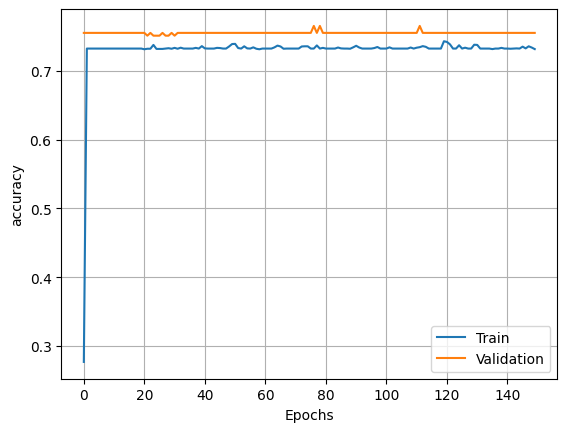

In [38]:
train_accuracy= history['accuracy']
val_accuracy= history["val_accuracy"]

plt.plot(train_accuracy)
plt.plot(val_accuracy)
plt.legend(["Train", "Validation"])
plt.xlabel("Epochs")
plt.ylabel("accuracy")
plt.grid()
plt.show()

# b. Build the 2nd model using same target and feature variables:
### i. Add a drop-out layer after the input layer with drop-out value of 0.3
### ii. Add a drop-out layer after the hidden layer with drop-out value of 0.2
### iii. Predict the values on the test set and build a confusion matrix
### iv. Plot the ‘Accuracy vs Epochs’ graph

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense,Dropout

In [39]:
model = Sequential() ## Empty model without any inputs or outputs
model.add(Input(shape=(1,))) ##no computation
model.add(Dropout(0.3))
model.add(Dense(units = 8, activation = "relu"))
model.add(Dropout(0.3))
model.add(Dense(units = 1, activation = "sigmoid"))# binary class classification output.

In [40]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics="accuracy")
# sgd = stochastic gradient descent

In [41]:
model.fit(x=X_train, y=y_train, epochs=150, validation_split = 0.2)

Epoch 1/150
124/124 [==============================] - 1s 4ms/step - loss: 5.5926 - accuracy: 0.5068 - val_loss: 0.5157 - val_accuracy: 0.7556
Epoch 2/150
124/124 [==============================] - 0s 2ms/step - loss: 2.5348 - accuracy: 0.6253 - val_loss: 0.6577 - val_accuracy: 0.7556
Epoch 3/150
124/124 [==============================] - 0s 3ms/step - loss: 1.9437 - accuracy: 0.6567 - val_loss: 0.7712 - val_accuracy: 0.7556
Epoch 4/150
124/124 [==============================] - 0s 3ms/step - loss: 1.6690 - accuracy: 0.6661 - val_loss: 0.7313 - val_accuracy: 0.7556
Epoch 5/150
124/124 [==============================] - 0s 3ms/step - loss: 1.3133 - accuracy: 0.6717 - val_loss: 0.7053 - val_accuracy: 0.7556
Epoch 6/150
124/124 [==============================] - 0s 3ms/step - loss: 1.1472 - accuracy: 0.6760 - val_loss: 0.6384 - val_accuracy: 0.7556
Epoch 7/150
124/124 [==============================] - 0s 3ms/step - loss: 1.0322 - accuracy: 0.6962 - val_loss: 0.5662 - val_accuracy: 0.7556

In [42]:
history = model.history.history

In [43]:
y_prediction = model.predict(X_test)

67/67 [==============================] - 0s 1ms/step


In [44]:
y_pred = np.argmax(y_prediction, axis = 1)

In [45]:
result = confusion_matrix(y_test, y_pred )

In [46]:
result

array([[1539,    0],
       [ 574,    0]])

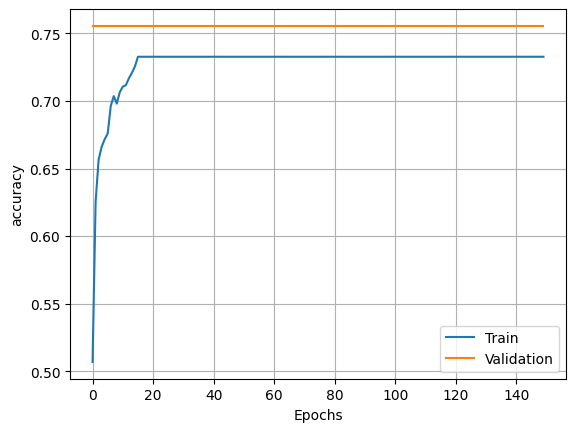

In [47]:
train_accuracy= history['accuracy']
val_accuracy= history["val_accuracy"]

plt.plot(train_accuracy)
plt.plot(val_accuracy)
plt.legend(["Train", "Validation"])
plt.xlabel("Epochs")
plt.ylabel("accuracy")
plt.grid()
plt.show()

# c. Build the 3rd model using ‘Tenure’, ’Monthly Charges’ & ‘Total Charges’ as the features and
‘Churn’ as the dependent/target column:
### i. The visible/input layer should have 12 nodes with ‘Relu’ as activation function.
### ii. This model would have 1 hidden layer with 8 nodes and ‘Relu’ as activation function
### iii. Use ‘Adam’ as the optimization algorithm
### iv. Fit the model on the train set, with number of epochs to be 150
### v. Predict the values on the test set and build a confusion matrix
### vi. Plot the ‘Accuracy vs Epochs’ graph

In [ ]:
dataset['TotalCharges'] = pd.to_numeric(dataset['TotalCharges'], errors='coerce')

In [90]:
X = dataset[['tenure', 'MonthlyCharges', 'TotalCharges']]

In [77]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tenure          7043 non-null   int64  
 1   MonthlyCharges  7043 non-null   float64
 2   TotalCharges    7032 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 165.2 KB


In [78]:
X

,tenure,MonthlyCharges,TotalCharges
0,1,29.85,29.85
1,34,56.95,1889.50
2,2,53.85,108.15
3,45,42.30,1840.75
4,2,70.70,151.65
...,...,...,...
7038,24,84.80,1990.50
7039,72,103.20,7362.90
7040,11,29.60,346.45
7041,4,74.40,306.60


In [ ]:
##X['TotalCharges'] = pd.to_numeric(X['TotalCharges'], errors='coerce')

<ipython-input-50-0ddd6730e0a6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['TotalCharges'] = pd.to_numeric(X['TotalCharges'], errors='coerce')


In [98]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [84]:
X_train.shape

(4930, 3)

In [85]:
y_train.shape

(4930,)

In [99]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense,Dropout

In [100]:
model = Sequential() ## Empty model without any inputs or outputs
model.add(Input(shape=(3,))) ##no computation
model.add(Dense(units = 8, activation = "relu"))
model.add(Dense(units = 1, activation = "sigmoid"))# binary class classification output.

In [101]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics="accuracy")
# sgd = stochastic gradient descent

In [102]:
model.fit(x=X_train, y=y_train, epochs=150, validation_split = 0.2)

Epoch 1/150
124/124 [==============================] - 2s 9ms/step - loss: nan - accuracy: 0.7328 - val_loss: nan - val_accuracy: 0.7556
Epoch 2/150
124/124 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.7328 - val_loss: nan - val_accuracy: 0.7556
Epoch 3/150
124/124 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.7328 - val_loss: nan - val_accuracy: 0.7556
Epoch 4/150
124/124 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.7328 - val_loss: nan - val_accuracy: 0.7556
Epoch 5/150
124/124 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.7328 - val_loss: nan - val_accuracy: 0.7556
Epoch 6/150
124/124 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.7328 - val_loss: nan - val_accuracy: 0.7556
Epoch 7/150
124/124 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.7328 - val_loss: nan - val_accuracy: 0.7556
Epoch 8/150
124/124 [====================

In [61]:
History  = model.history.history

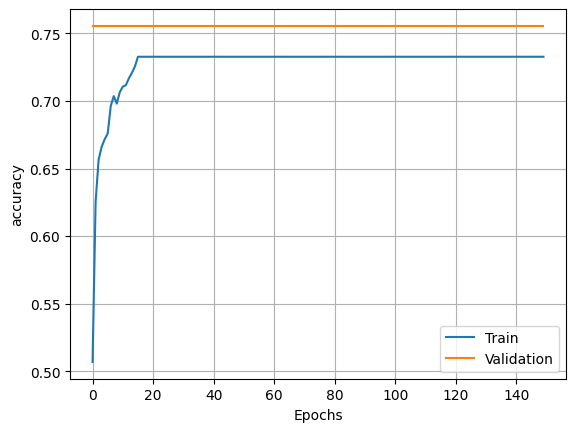

In [62]:
train_accuracy= history['accuracy']
val_accuracy= history["val_accuracy"]

plt.plot(train_accuracy)
plt.plot(val_accuracy)
plt.legend(["Train", "Validation"])
plt.xlabel("Epochs")
plt.ylabel("accuracy")
plt.grid()
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
y_prediction = model.predict(X_test)

67/67 [==============================] - 0s 1ms/step


In [ ]:
y_pred = np.argmax(y_prediction, axis = 1)

In [ ]:
result = confusion_matrix(y_test, y_pred , normalize='pred')

In [ ]:
result

array([[0.72834832, 0.        ],
       [0.27165168, 0.        ]])